This was about exploring the use of k-means clustering to classify future image pixels instead of extrapolate them. I thought this was the kind of sacrifice that I would have to make in order to produce good output images. I think at this point I was also still avoiding convolutional models, which is just wrong. I think the only thing that came out of this k-means stuff was the ability for me to automatically produce a pretty good outline of cell bodies that I could use to train a model. And I think in the future, even that task would be better handled by a signal-boosting model to reduce noise. With reduced noise, outlining is much easier. Even so, outlining is unnecessarily hi-res. Almost anything we would want to do would just require a rectangular crop of the cell body and that would be much easier to build a model for. 

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import torch
from PIL import Image
from scipy.signal import convolve2d
from skimage.measure import block_reduce

PATH = r'D:\Code\kural_work\movie_generation\data\\'

In [271]:
img_ = Image.open(PATH+'s01_5m_2s_100ms_25p.tif')
nf = img_.n_frames
movie_data = np.zeros((nf,256*256))
for f in range(nf):
    img_.seek(f)
    tmp = img_.crop(box=(117,102,373,358))
    movie_data[f,:] = np.asarray(list(tmp.getdata()))
    

In [4]:
img_ = Image.open(PATH+'s01_5m_2s_100ms_25p.tif')
nf = img_.n_frames
movie_data = np.zeros((nf,512*512))
for f in range(nf):
    img_.seek(f)
    movie_data[f,:] = np.asarray(list(img_.getdata()))
    

In [5]:
img_data = movie_data.flatten()

In [6]:
K=3
cent = np.asarray([np.min(img_data),np.median(img_data),np.max(img_data)])
loss_list = []
for _ in range(30):
    nearest_cent = np.argmin(np.abs(img_data.reshape(-1,1)-cent.reshape(1,-1)),axis=1)
    for i in range(K):
        cent[i] = np.mean(img_data[nearest_cent==i])
    cent = np.sort(cent)
    loss_list.append(np.sum(np.sqrt((cent[nearest_cent]-img_data)**2))/img_data.size)

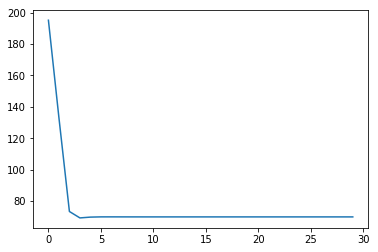

In [7]:
plt.plot(loss_list)

In [221]:
img_data = np.double(img.flatten())

In [92]:
nearest_cent = np.argmin(np.abs(img_data.reshape(-1,1)-cent.reshape(1,-1)),axis=1)

In [98]:
dark_noise = img_data[nearest_cent==0]
cell_background = img_data[nearest_cent==1]
pits = img_data[nearest_cent==2]

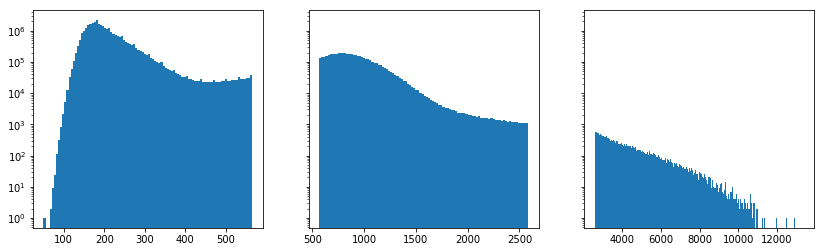

In [110]:
fig,ax = plt.subplots(1,3,figsize=[14,4],sharey=True)
ax[0].hist(dark_noise,bins=100)
ax[1].hist(cell_background,bins=100)
ax[2].hist(pits,bins=1000)
for i in range(3):
    ax[i].set_yscale('log')
plt.show()

In [8]:
f = 0

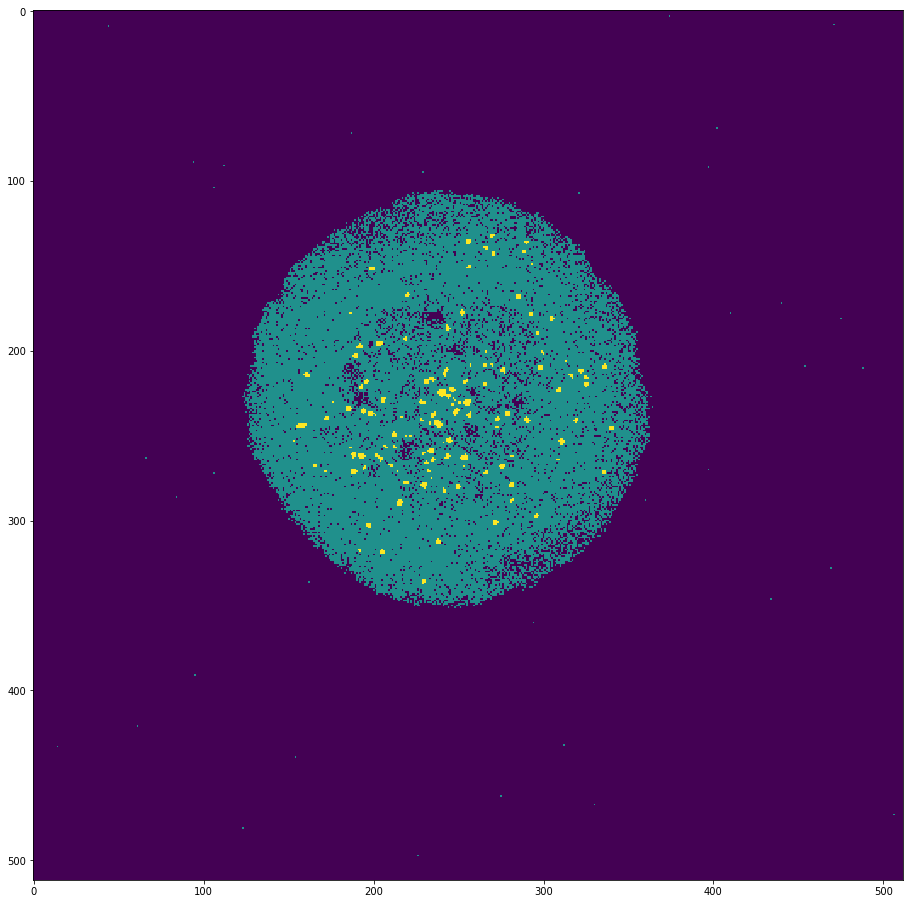

In [91]:
nearest_cent = np.argmin(np.abs(movie_data[f,:].reshape(-1,1)-cent.reshape(1,-1)),axis=1)
plt.figure(figsize=[16,16])
plt.imshow(nearest_cent.reshape(512,512))
f+=1

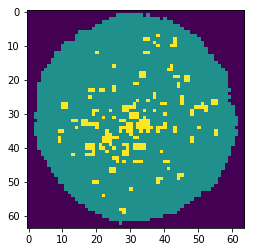

In [354]:
nearest_cent = np.argmin(np.abs(movie_data[f,:].reshape(-1,1)-cent.reshape(1,-1)),axis=1)
plt.imshow(block_reduce(nearest_cent.reshape(256,256),(4,4),np.max))
f+=1

In [17]:
K = 3
cent = np.random.choice(img_data, size=K, replace=False)

In [29]:
nearest_cent = np.argmin(np.abs(img_data.reshape(-1,1)-cent.reshape(1,-1)),axis=1)

In [30]:
mean_cent = np.zeros(K)
for i in range(K):
    mean_cent[i] = np.mean(img_data[nearest_cent==i])

In [31]:
mean_cent

array([1095.67095424,  535.7802043 ,  199.14595439])

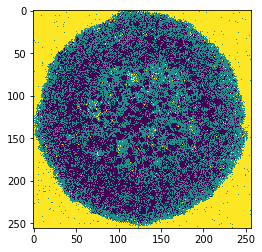

In [33]:
plt.imshow(np.argmin(np.abs(img_data.reshape(-1,1)-mean_cent.reshape(1,-1)),axis=1).reshape(256,256))

In [258]:
K = 3
nf = img_.n_frames
img_.seek(100)
tmp = img_.crop(box=(117,102,373,358))
img = np.asarray(list(tmp.getdata())).reshape(256,256)
img_data = np.double(img.flatten())
cent = np.asarray([np.min(img_data),np.median(img_data),np.max(img_data)])
loss_list = []
for _ in range(30):
    nearest_cent = np.argmin(np.abs(img_data.reshape(-1,1)-cent.reshape(1,-1)),axis=1)
    for i in range(K):
        cent[i] = np.mean(img_data[nearest_cent==i])
    cent = np.sort(cent)
    loss_list.append(np.sum(np.sqrt((cent[nearest_cent]-img_data)**2))/img_data.size)

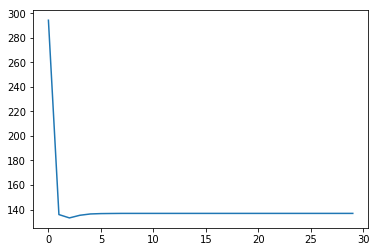

In [129]:
plt.plot(loss_list)

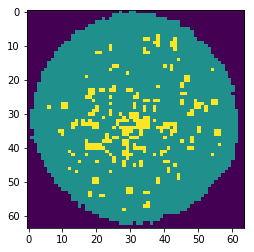

In [270]:
ind_img = np.argmin(np.abs(img_data.reshape(-1,1)-cent.reshape(1,-1)),axis=1).reshape(256,256)
plt.imshow(block_reduce(ind_img,(4,4),np.max))
# plt.hist(np.argmin(np.abs(img_data.reshape(-1,1)-cent.reshape(1,-1)),axis=1),bins=np.arange(K+1)-.5,density=True)

In [249]:
K = 3
nf = img_.n_frames
prop_2 = []
for f in range(nf):
    img_.seek(f)
    tmp = img_.crop(box=(117,102,373,358))
    img = np.asarray(list(tmp.getdata())).reshape(256,256)
    img_data = np.double(img.flatten())
    # cent = np.random.choice(img_data, size=K, replace=False)
    # cent = np.sort(cent)
    cent = np.asarray([np.min(img_data),np.median(img_data),np.max(img_data)])
    loss_list = []
    for _ in range(20):
        nearest_cent = np.argmin(np.abs(img_data.reshape(-1,1)-cent.reshape(1,-1)),axis=1)
        for i in range(K):
            cent[i] = np.mean(img_data[nearest_cent==i])
        cent = np.sort(cent)
        loss_list.append(np.sum(np.sqrt((cent[nearest_cent]-img_data)**2))/img_data.size)

#     plt.imshow(np.argmin(np.abs(img_data.reshape(-1,1)-cent.reshape(1,-1)),axis=1).reshape(256,256))
    tmp, _ = np.histogram(np.argmin(np.abs(img_data.reshape(-1,1)-cent.reshape(1,-1)),axis=1),bins=np.arange(K+1)-.5,density=True)
    prop_2.append(tmp[2])

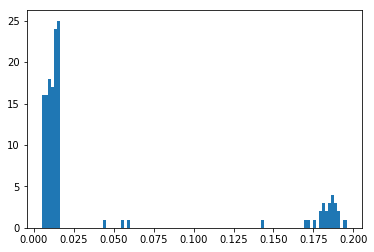

In [253]:
plt.hist(prop_2,bins=100)
plt.show()

(array([0.52331543, 0.29571533, 0.18096924]),
 array([-0.5,  0.5,  1.5,  2.5]),
 <a list of 3 Patch objects>)

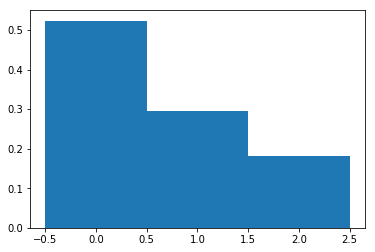

In [244]:
plt.hist(np.argmin(np.abs(img_data.reshape(-1,1)-cent.reshape(1,-1)),axis=1),bins=np.arange(K+1)-.5,density=True)

In [246]:
tmp, _ = np.histogram(np.argmin(np.abs(img_data.reshape(-1,1)-cent.reshape(1,-1)),axis=1),bins=np.arange(K+1)-.5,density=True)

In [247]:
tmp

array([0.52331543, 0.29571533, 0.18096924])

In [257]:
K = 2
nf = img_.n_frames
img_.seek(100)
tmp = img_.crop(box=(117,102,373,358))
img = np.asarray(list(tmp.getdata())).reshape(256,256)
img_data = np.double(img.flatten())
# cent = np.random.choice(img_data, size=K, replace=False)
# cent = np.sort(cent)
cent = np.asarray([np.min(img_data),np.median(img_data),np.max(img_data)])
loss_list = []
for _ in range(20):
    nearest_cent = np.argmin(np.abs(img_data.reshape(-1,1)-cent.reshape(1,-1)),axis=1)
    for i in range(K):
        cent[i] = np.mean(img_data[nearest_cent==i])
    cent = np.sort(cent)
    loss_list.append(np.sum(np.sqrt((cent[nearest_cent]-img_data)**2))/img_data.size)

#     plt.imshow(np.argmin(np.abs(img_data.reshape(-1,1)-cent.reshape(1,-1)),axis=1).reshape(256,256))
# tmp, _ = np.histogram(np.argmin(np.abs(img_data.reshape(-1,1)-cent.reshape(1,-1)),axis=1),bins=np.arange(K+1)-.5,density=True)
print(loss_list[-1])

233.96286663703745
